## Question 1

**Factorial**: Write a function to compute n!.

In [1]:
# An iterative solution
def factorial(n):
    result = 1
    while n > 0:
        result *= n
        n -= 1
    return result

In [2]:
factorial(0) == 1

True

In [3]:
factorial(1) == 1

True

In [4]:
factorial(2) == 2

True

In [5]:
factorial(3) == 6

True

In [6]:
factorial(4) == 24

True

In [7]:
# A recursive solution
def factorial_rec(n):
    if n <= 1:
        return 1
    else:
        return n * factorial_rec(n-1)

Test that iterative and recursive functions return the same result when applied to all integers in the range 0 to 99.

In [13]:
all([factorial(n) == factorial_rec(n) for n in range(100)])

True

----

## Question 2

**Modulus**: Write a function to compute a mod b. Make sure you consider all the possible combinations of sign (i.e. -a mod b, a mod -b, -a mod -b and a mod b).

In [14]:
def modulus(a, b):
    return a % b

In [27]:
[(n, modulus(10, n)) for n in range(-5, 6) if n != 0]

[(-5, 0),
 (-4, -2),
 (-3, -2),
 (-2, 0),
 (-1, 0),
 (1, 0),
 (2, 0),
 (3, 1),
 (4, 2),
 (5, 0)]

----

## Question 3

**List of a lists**: Make a function that takes two numbers, m and n, and returns a nested list. The inner lists will contain the letters of the alphabet up to the mth letter. There will be n of the inner list in the main list, so the output should look like:

```Python
[['a','b','c','d',...], ['a','b','c','d',...], ['a','b','c','d',...], ...]
```

In [30]:
alphabet = "abcdefghijklmnopqrstuvwxyz"

In [41]:
def list_of_lists(m, n):
    # assuming m is bounded by the length of the alphabet
    assert(m <= len(alphabet))
    outer_list = []
    while n > 0:
        inner_list = []
        index_inner = 0
        while index_inner < m:
            inner_list.append(alphabet[index_inner])
            index_inner += 1
        outer_list.append(inner_list)
        n -= 1
    return outer_list

In [42]:
list_of_lists(3, 4)

[['a', 'b', 'c'], ['a', 'b', 'c'], ['a', 'b', 'c'], ['a', 'b', 'c']]

In [43]:
list_of_lists(0, 0)

[]

In [21]:
10 % 3

1

In [47]:
list_of_lists(26, 1)

[['a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z']]

In [48]:
list_of_lists(27, 1)

AssertionError: 

In [44]:
# Using a list comprehension
def list_of_lists_comp(m, n):
    assert(m <= len(alphabet))
    return [[alphabet[i] for i in range(m)] for _count in range(n)]

In [45]:
list_of_lists_comp(3, 4)

[['a', 'b', 'c'], ['a', 'b', 'c'], ['a', 'b', 'c'], ['a', 'b', 'c']]

In [46]:
list_of_lists_comp(0, 0)

[]

In [49]:
list_of_lists_comp(27, 1)

AssertionError: 

----

## Question 4

**Lists of list**: Write a function that takes two numbers, m and n, and returns a nested list. The inner lists will contain a letter of the alphabet. There will be n inner lists in the main list, with each successive list incrementing through the alphabet to the nth letter, so the output should look like:

```Python
[['a','a','a','a',...], ['b','b','b','b',...], ['c','c','c','c',...], ['d','d','d','d',...], ...]
```

A slight modification of problem 3 should yield this. 

In [56]:
# Using a list comprehension
def lists_of_list(m, n):
    assert(n <= len(alphabet))
    return [[alphabet[i]] * m for i in range(n)]

In [57]:
lists_of_list(4, 5)

[['a', 'a', 'a', 'a'],
 ['b', 'b', 'b', 'b'],
 ['c', 'c', 'c', 'c'],
 ['d', 'd', 'd', 'd'],
 ['e', 'e', 'e', 'e']]

----

## Question 5

**Lists from tuples**: Take a list of tuples, and return a list of two lists, with the first list containing the first entry in the tuples, the second list containing the second entry in the tuples. 
The input should look like:
```
[('a',1),('b',2),('c',3),...]
```
(or whatever you want your tuples to contain).
The output should look like:
```
[['a','b','c',...], [1,2,3,...]]
```

In [58]:
def lists_from_tuples(tuples):
    firsts = []
    seconds = []
    for item1, item2 in tuples:
        firsts.append(item1)
        seconds.append(item2)
    return [firsts, seconds]

In [60]:
lists_from_tuples([('a',1),('b',2),('c',3)])

[['a', 'b', 'c'], [1, 2, 3]]

In [61]:
lists_from_tuples([])

[[], []]

----

## Question 6

**Tuples to dictionary**: Take a list of tuples, and return a dictionary with the dictionary key being the first entry in the tuples, and the dictionary entries being a a list of the second entry in the tuples where the first entry was the key.

The input should look like:
```
[('a',1),('b',2),('c',3),('c',3),('a',4),('c',10),('b',1),... ]
```
(or whatever you want your tuples to contain, but it'll be boring if you don't have duplicate first entries in the tuples!)

The output should look like:
```
{ 'a':[1,4], 'b':[2,1], 'c':[3,3,10] }
```
Bonus: Can you modify your code so that the lists in each dictionary entry are sorted from smallest to largest value?

In [62]:
def tuples_to_dictionary(tuples):
    result = {}
    for item1, item2 in tuples:
        if item1 in result:
            result[item1].append(item2)
        else:
            result[item1] = [item2]
    # sort the lists for each key
    for key in result:
        result[key].sort()
    return result

In [63]:
tuples_to_dictionary([('a',1),('b',2),('c',3),('c',3),('a',4),('c',10),('b',1)])

{'a': [1, 4], 'b': [1, 2], 'c': [3, 3, 10]}

In [64]:
tuples_to_dictionary([])

{}

----

## Question 7

**Sort tuples**: Write a function to take a list of tuples, and return a list of the same tups, sorted by the first tuple entry.

The input should look like:

```Python
[ ('a',1),('b',2),('c',3),('c',13),('a',4),('c',10),('b',1),... ]
```

(or whatever you want your tuples to contain, but it'll be boring if you don't have duplicate first entries in the tuples!)

The output should look like:

```Python
[('a',1), ('a',4), ('b',2), ('b',1), ('c',3), ('c',13), ('c',10),... ]
```

Now modify your code to sort by the first tuple entry, then by the second entry so your output looks like:

```
[ ('a',1), ('a',4), ('b',1), ('b',2), ('c',3), ('c',10), ('c',13),... ] 
```

In [68]:
def sort_tuples(tuples):
    return sorted(tuples)

In [69]:
sort_tuples([('a',1),('b',2),('c',3),('c',13),('a',4),('c',10),('b',1)])

[('a', 1), ('a', 4), ('b', 1), ('b', 2), ('c', 3), ('c', 10), ('c', 13)]

----

## Question 8

**Remove empty tuples**: Write a function to take a list of tuples and remove any empty tuples. Hint: Remember that empty things like [], (), {} evaluate to False if treated a as boolean.

The input should look like:

```
[ ('f', 3), ('e', 9), ('j', 5), (), ('d', 1), ('g', 2), () ]
```

The output should look like:

```
[('f', 3), ('e', 9), ('j', 5), ('d', 1), ('g', 2)]
```


In [72]:
# Solution using a for loop
def remove_empty_tuples(tuples):
    result = []
    for this_tuple in tuples:
        if this_tuple is not ():
            result.append(this_tuple)
    return result

In [73]:
remove_empty_tuples([ ('f', 3), ('e', 9), ('j', 5), (), ('d', 1), ('g', 2), () ])

[('f', 3), ('e', 9), ('j', 5), ('d', 1), ('g', 2)]

In [74]:
# using a list comprehension
def remove_empty_tuples_comp(tuples):
    return [this_tuple for this_tuple in tuples if this_tuple is not ()]

In [78]:
remove_empty_tuples_comp([ ('f', 3), ('e', 9), ('j', 5), (), ('d', 1), ('g', 2), ()])

[('f', 3), ('e', 9), ('j', 5), ('d', 1), ('g', 2)]

In [79]:
# using the built in filter function
def remove_empty_tuples_filter(tuples):
    return filter(lambda t: t is not (), tuples)

In [80]:
remove_empty_tuples_filter([('f', 3), ('e', 9), ('j', 5), (), ('d', 1), ('g', 2), ()])

[('f', 3), ('e', 9), ('j', 5), ('d', 1), ('g', 2)]

----

## Question 9

**Sum array**: Write a function to sum from x0, with x1 steps of size xi, keeping the result for each successive step. Return the initial value, followed by the x1 results in a numpy array. For example for x0=5, x1=10, xi=1.5 the result would be either as a numpy array:

```
numpy.array([5.0, 6.5, 8.0, 9.5, 11.0, 12.5, 14.0, 15.5, 17.0, 18.5, 20.0])
```

or as a list:

```
[5.0, 6.5, 8.0, 9.5, 11.0, 12.5, 14.0, 15.5, 17.0, 18.5, 20.0]
```

(note the first entry in the array is the initial value x0)


In [85]:
# solution using lists
def sum_array(start, steps, step_size):
    result = [start]
    current = start
    for _count in range(steps):
        current += step_size
        result.append(current)
    return result

In [88]:
sum_array(5.0, 10, 1.5)

[5.0, 6.5, 8.0, 9.5, 11.0, 12.5, 14.0, 15.5, 17.0, 18.5, 20.0]

In [6]:
import numpy as np
# solution using range for numpy arrays
def sum_array_arange(start, steps, step_size):
    return np.arange(start, start + (steps + 1) * step_size, step_size)

In [7]:
sum_array_arange(5.0, 10, 1.5)

array([  5. ,   6.5,   8. ,   9.5,  11. ,  12.5,  14. ,  15.5,  17. ,
        18.5,  20. ])

----

## Question 10

**Plot x^n**: Write a function which uses the module matplotlib.pyplot to plot x against x^n with m points in the range (xmin,xmax), for input values of xmin, xmax, n and m. Hint: Matplotlib has a very useful website - check it out if you're stuck. You may also like to try adding axis labels and playing with the linewidth and line color properties… 

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [19]:
def plot_power(power, num_points, xmin, xmax):
    # 100 linearly spaced numbers
    x = np.linspace(xmin, xmax, num_points)
    y = np.power(x, power)
    plt.plot(x, y)

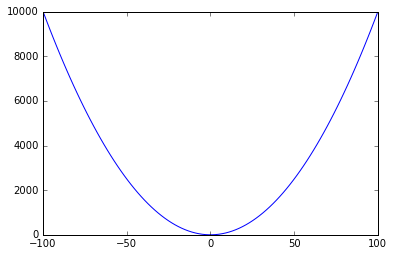

In [22]:
plot_power(2, 100, -100, 100)

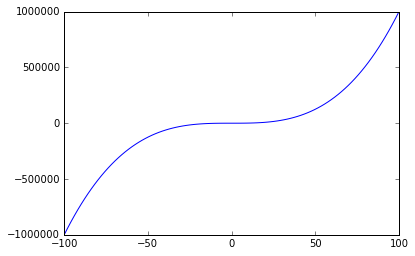

In [23]:
plot_power(3, 100, -100, 100)